In [2]:
import pandas as pd
#inline means that a graphics generate will be shown in this display
%matplotlib inline

In [5]:
# Import DataFrame
# if csv don't are split per ",", then we've to add a new args to method, 
# ex: read_csv('x.csv', sep=';')

#the pattern code to decode file in read_csv() method is utf-8
# if the file don't use this enconde, use enconding='cp1252'

# if is necessary skip same line in the sheet, use skiprows=n or skipfooter=n to remove the footers line
df = pd.read_csv('ocomon_FINAL.csv')

In [6]:
df.head(3)

,DESCRIB,PROB_ORIG,PROB,ESPC,EQUIP,I_NAME,R_NAME,C_NAME,EQUIP_ID,HAS_VALUE,...,HOUR_OPEN,MIN_OPEN,DATA_OPEN,CLOSE_YEAR_4,CLOSE_MONTH_4,CLOSE_DAY_4,HOUR_CLOSE,MIN_CLOSE,DATA_CLOSE,STI
0,foi solicitado a manutencao de pontos de reded...,NaN,N.A,NaN,internet,teresina,jaclason machado veras,julia sousa santos,-999999,NaN,...,9,15,18/4/2012,1,2,4,9,0,26/4/2012,sti_cca
1,computador nao liga sujeira e mau na memoria ...,NaN,hardware,ram,computador,teresina,secretaria do mestrado de piliticas publicas,luis carlos dos santos farias,140981,P,...,8,13,23/4/2014,2,2,4,9,4,23/4/2014,sti_cchl
2,meu computador esta ligando o monitor tb mas a...,NaN,hardware,monitor,monitor,teresina,gabinete do reitor 5511,constanca dolores lopes monteiro,-999999,P,...,15,43,24/10/2011,1,4,4,15,59,24/10/2011,sti_central


In [8]:
# alter columns name 
# df.columns = ['Descrição', 'Ano', 'Mês', 'Dia', 'Atendente', 'Departamento', 'Local', 
#               'Cidade', 'Tipo de Equipamento', 'Tipo de Problema', 'Especificação do Problema']

In [11]:
df.shape

(15802, 25)

In [12]:
df.describe()

,EQUIP_ID,OPEN_YEAR_4,OPEN_MONTH_4,OPEN_DAY_4,HOUR_OPEN,MIN_OPEN,CLOSE_YEAR_4,CLOSE_MONTH_4,CLOSE_DAY_4,HOUR_CLOSE,MIN_CLOSE
count,1.580200e+04,15802.000000,15802.000000,15802.000000,15802.000000,15802.000000,15802.000000,15802.000000,15802.000000,15802.000000,15802.000000
mean,2.535997e+07,2.175990,2.384951,2.667384,12.067397,29.576699,1.736742,2.093532,2.304898,10.966523,25.963802
std,2.321736e+08,1.002167,1.131484,1.134959,2.984860,17.241296,1.282926,1.496906,1.547816,4.987646,18.575372
min,-9.999990e+05,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-9.999990e+05,1.000000,1.000000,2.000000,9.000000,15.000000,1.000000,1.000000,1.000000,9.000000,9.000000
50%,9.943000e+03,2.000000,2.000000,3.000000,11.000000,30.000000,2.000000,2.000000,3.000000,11.000000,26.000000
75%,1.424095e+05,3.000000,3.000000,4.000000,15.000000,44.000000,2.000000,3.000000,4.000000,15.000000,42.000000
max,2.147484e+09,4.000000,4.000000,4.000000,23.000000,59.000000,4.000000,4.000000,4.000000,23.000000,59.000000


In [13]:
df.groupby(['Departamento', 'Ano', 'Mês'])['Mês'].count()

KeyError: 'Departamento'

In [7]:
df['Departamento'].unique()
df['Departamento'].value_counts()

0                2617
ccn              2175
ccs              1977
cca              1487
cchl             1237
prad             1037
cce               862
ct                607
administracao     600
campus            425
preg              416
nti               394
praec             378
prppg             290
biblioteca        272
prex              219
proplan           160
cead              109
tropen            105
fadex              96
hu                 95
juizado            63
nintec             55
parfor             49
dce                36
ntf                27
noe                11
Name: Departamento, dtype: int64

In [8]:
%matplotlib
df['Departamento'].value_counts().plot.pie()

Using matplotlib backend: Qt5Agg


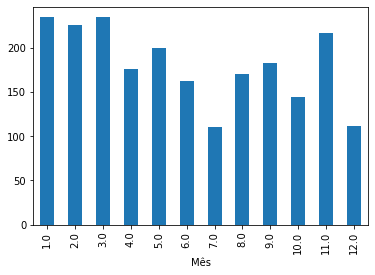

In [83]:
#get only registers from ccn department
df_ccn = df[df['Departamento'] == 'ccn']
df_ccn.groupby('Mês')['Mês'].count().plot.bar()

In [12]:
df_ccn.sample(3)

,Descrição,Ano,Mês,Dia,Atendente,Departamento,Local,Cidade,Tipo de Equipamento,Tipo de Problema,Especificação do Problema
8236,instalar impressora,2014.0,1.0,7.0,constanca dolores lopes monteiro,ccn,coordenacao do curso de fisica,teresina,impressora,software,instalacao
13227,computador reinicia sozinho,2016.0,8.0,25.0,danillo brito da mata,ccn,departamento de quimica,teresina,computador,software,s.o
7034,a cpu nao esta ligando formatar e instalar ubu...,2013.0,9.0,13.0,allan moura melao,ccn,departamento de matematica,teresina,computador,hardware,fonte


In [13]:
df_ccn['Tipo de Equipamento'].value_counts()

computador          1373
impressora           202
nobreak              166
ponto de rede        138
e-mail               116
datashow              45
internet              40
Não especificado      22
notebook              21
fibra                 15
monitor               12
roteador              10
switch                 9
cabo de rede           2
subpaginas             1
senha                  1
ap                     1
estabilizador          1
Name: Tipo de Equipamento, dtype: int64

In [16]:
df_ccn['Local'].value_counts()

departamento de fisica                                                507
departamento de quimica                                               266
departamento de matematica                                            235
secretaria administrativa                                             154
departamento de biologia                                              154
posgraduacao fisica                                                   144
departamento de informatica e estatistica                             127
coordenacao do curso de ciencia da computacao                          91
diretoria                                                              80
coordenacao do curso de matematica                                     76
coordenacao do curso de fisica                                         57
limav laboratorio interdisciplinar de materiais avancados              56
biblioteca ial                                                         48
curso de bacharelado em arqueologia e 

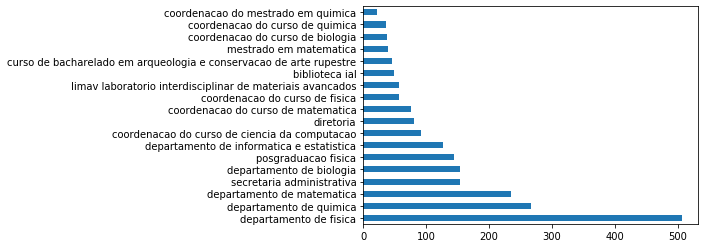

In [50]:
df_ccn['Local'].value_counts().plot.barh()

In [15]:
df_ccn[df_ccn['Descrição'].str.contains('queimado')]

,Descrição,Ano,Mês,Dia,Atendente,Departamento,Local,Cidade,Tipo de Equipamento,Tipo de Problema,Especificação do Problema
1144,da solicitacao stcnome monica regina silva de...,2012.0,2.0,2.0,julio froz,ccn,departamento de quimica,teresina,computador,hardware,fonte
8624,cpu desligou sozinha cheiro de queimado nao li...,2014.0,2.0,5.0,constanca dolores lopes monteiro,ccn,departamento de fisica,teresina,computador,n.a,n.a
8707,nao funciona desde emissao de fumaca e cheiro ...,2014.0,2.0,13.0,constanca dolores lopes monteiro,ccn,departamento de fisica,teresina,computador,hardware,fonte
10315,cheiro de queimado problema na placamae,2014.0,9.0,4.0,gustavo borges bezerra,ccn,departamento de quimica,teresina,computador,hardware,placa
10681,apagou cheiro de queimado,2014.0,12.0,9.0,julio barbosa soares,ccn,departamento de fisica,teresina,computador,n.a,n.a
11444,apos uma queda de energia saiu fumaca da cpu i...,2015.0,4.0,29.0,isaias miranda leite,ccn,departamento de informatica e estatistica,teresina,computador,hardware,hardware
13753,saiu fumacanao liga cheiro de queimado,2017.0,3.0,14.0,alan sousa,ccn,departamento de quimica,teresina,computador,hardware,hardware
14102,nobreak queimado,2017.0,6.0,9.0,goncalo amarante ferreira neto,ccn,coordenacao do curso de ciencia da computacao,teresina,nobreak,queimado,N.A
14440,o computador desliga abruptamente enquanto est...,2017.0,9.0,29.0,rafael marques da silva,ccn,departamento de fisica,teresina,computador,hardware,placa
14450,nobreak queimadoobs servidor,2017.0,10.0,4.0,alan sousa,ccn,coordenacao do curso de ciencia da computacao,teresina,nobreak,queimado,N.A


In [32]:
#get only registers that are sets to STI_central
df_central = df[(df['Departamento'] == 'ccn')
            | (df['Departamento'] == 'administracao') 
            | (df['Departamento'] == 'ccs') 
            | (df['Departamento'] == 'prad') 
            | (df['Departamento'] == 'praec') 
            | (df['Departamento'] == 'prex' )
            | (df['Departamento'] == 'nti' )
            | (df['Departamento'] == 'prppg') 
            | (df['Departamento'] == 'proplan') 
            | (df['Departamento'] == 'prppg' )
            | (df['Departamento'] == 'tropen' )
            | (df['Departamento'] == 'fadex' )
            | (df['Departamento'] == 'juizado') 
            | (df['Departamento'] == 'nintec' )
            | (df['Departamento'] == 'parfor' )
            | (df['Departamento'] == 'dce' )
            | (df['Departamento'] == 'ntf')]

In [38]:
df_central.sample(3)

,Descrição,Ano,Mês,Dia,Atendente,Departamento,Local,Cidade,Tipo de Equipamento,Tipo de Problema,Especificação do Problema
3491,instalacao de drive de cd dvd e instalacao de ...,2012.0,9.0,3.0,caio emmanuel da s costa,ccn,diretoria,teresina,computador,software,virus
7448,maria do livramento fortes figueiredo chefia d...,2013.0,10.0,10.0,constanca dolores lopes monteiro,ccs,departamento de enfermagem,teresina,computador,software,s.o
7987,papel sai em branco na impressaoobs local prex...,2013.0,11.0,29.0,felipe augusto de araujo coelho,prex,secretaria administrativa,teresina,impressora,hardware,fisico


In [159]:
df_central.groupby('Local').max()

,Descrição,Ano,Mês,Dia,Atendente,Departamento,Tipo de Equipamento,Tipo de Problema,Especificação do Problema
Local,,,,,,,,,
assessoria de social,tela azul,2019.0,12.0,30.0,wolney garcias do nascimento,administracao,ponto de rede,software,s.o
assessoria especial da reitoria,sem internet,2019.0,11.0,24.0,guilherme avelino,administracao,impressora,software,virus
auditoria interna,virus,2016.0,12.0,29.0,roberson do nascimento costa,administracao,impressora,software,virus
biblioteca ial,virus biblioteca ial ccs centro,2019.0,12.0,31.0,saulo de tarsio s sousa,ccs,ponto de rede,software,virus
bioterio central,impressora nao esta imprimindo procurar a lais...,2017.0,4.0,24.0,marcelo ramos de melo,prad,impressora,software,nao liga
...,...,...,...,...,...,...,...,...,...
secretaria administrativa,ñao consigo concluir o procedimento de acesso ...,2019.0,12.0,31.0,wolney garcias do nascimento,prppg,switch,software,virus
– secretaria administrativa,viruslimpeza e servicos gerais,2018.0,12.0,30.0,wanderson oliveira de abreuct,administracao,roteador,software,virus
– secretaria do gabinete,nnn,2019.0,11.0,27.0,paulo sales,administracao,impressora,software,virus


In [141]:
# graphic horizont bar
# df_central['Local'].value_counts().plot.pie(title='Problemas por locais')

In [ ]:
# get n largests ou smallets elements, util to use in prices
#df.nlargest(5, 'col') e df.nsmallest(qtd,'col')

In [181]:
#clearing data/row without value
df_new = df[(df['Ano'] > 0) | (df['Mês'] > 0) | (df['Dia'] > 0)].copy()

In [182]:
df_new.shape

(15802, 11)

In [183]:
df.shape

(15827, 11)